# MNIST dataset visualisation

Dataset versions, in increasing difficulty:

0. `onehot-bags` (not in PDF file, but self-explanatory)
1. `mnist-bags`
2. `multi-mnist-bags`
3. `mnist-collage`
4. `mnist-patch-collage`

In [1]:
import torch
import itertools

from mil.data.mnist import MNISTBags, OneHotMNISTBags, MNISTCollage, OneHotMNISTCollage
from mil.utils.visualize import plot_bag, print_one_hot_bag

/Users/georg/Projects/mil/mil_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0. `onehot-bags`

This dataset is a simplified version of `mnist-bags` (or `multi-mnist-bags`), where the instances are one-hot encoded 10-dimensional vectors representing the digits as opposed to the actual MNIST pictures.

In [2]:
ds = OneHotMNISTBags(target_numbers = 0, # target number
                     min_instances_per_target = 1, # 1 instance of a "0" suffices to label a bag as positive
                     num_digits = 10, # sample from all 10 MNIST digits
                     mean_bag_size = 10, # mean bag length
                     var_bag_size = 2, # variance of bag length
                     num_bags = 250, # number of bags
                     seed = 1,
                     train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn = lambda x: x[0])

for bag in itertools.islice(loader, 10):
    print_one_hot_bag(bag)

+  bag: {0 5 4 8 2 6 8 1 8 3}
+  bag: {2 2 8 5 0 5 9 8 6}
+  bag: {5 0 4 4 6 7 9 2 2}
+  bag: {0 6 0 7 4 6 1 2}
-  bag: {2 9 6 3 5 2 5 6 7 9}
+  bag: {0 5 1 9 6 8 9 2 6 9 6 1}
+  bag: {6 2 9 2 7 5 0 7}
+  bag: {6 7 6 3 0 6 4 7}
+  bag: {1 9 9 4 5 9 4 8 6 5 0 8 6 6}
-  bag: {6 2 7 2 6 4 5 4 1 3}


# 1. `mnist-bags`

In [3]:
ds = MNISTBags(target_numbers = 0, # target number
               min_instances_per_target = 1, # 1 instance of a "0" suffices to label a bag as positive
               num_digits = 10, # sample from all 10 MNIST digits
               mean_bag_size = 10, # mean bag length
               var_bag_size = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

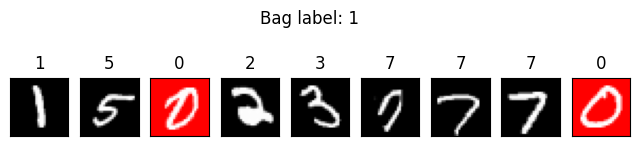

In [4]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

# 2. `multi-mnist-bags`

This is the same as `mnist-bags` but we set `target_number = (0, 1)` (a tuple instead of just an int).

In [5]:
ds = MNISTBags(target_numbers = (0, 1), # target number
               min_instances_per_target = 1, # 1 instance per target number suffices to label a bag as positive
               num_digits = 10, # sample from all 10 MNIST digits
               mean_bag_size = 10, # mean bag length
               var_bag_size = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

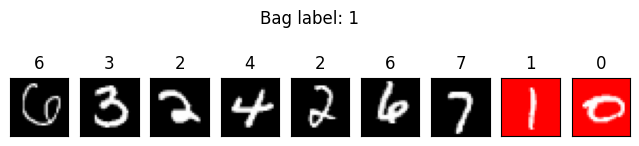

In [6]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

# 3. `mnist-collage`

This dataset is initialized with using the `MNISTCollage` class which takes similar arguments as `MNISTBags`, except for:
- `min_instances_per_target` is not an argument
- `collage_size` and `min_dist` are new arguments to control collage creation

In [7]:
ds = MNISTCollage(target_numbers = (0, 1), # target number
                  num_digits = 10, # sample from all 10 MNIST digits
                  mean_bag_size = 10, # mean bag length
                  var_bag_size = 2, # variance of bag length
                  num_bags = 250, 
                  collage_size=256, # size of the collage
                  min_dist=20, # minimum distance between instances of target numbers to be considered a positive bag
                  seed = 1,
                  train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

In [9]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

TypeError: only integer tensors of a single element can be converted to an index

In [ ]:
ds = OneHotMNISTCollage(target_numbers = (0, 1), # target number
                        num_digits = 10, # sample from all 10 MNIST digits
                        mean_bag_size = 10, # mean bag length
                        var_bag_size = 2, # variance of bag length
                        num_bags = 250, 
                        collage_size=256, # size of the collage
                        min_dist=20, # minimum distance between instances of target numbers to be considered a positive bag
                        seed = 1,
                        train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

In [ ]:
bag = next(it)

RuntimeError: one_hot is only applicable to index tensor.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(*bag.instance_locations.T)